In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.shape

(400, 3)

In [5]:
df.size

1200

In [6]:
df['Virus Present'].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

In [7]:
df.Med_1_mL.skew()

-0.011421973953190495

In [8]:
df.Med_2_mL.skew()

0.004315085455234912

In [9]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

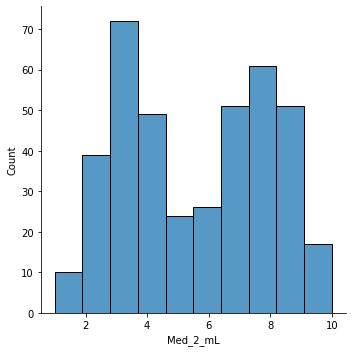

In [10]:
sns.displot(x='Med_2_mL',data=df)

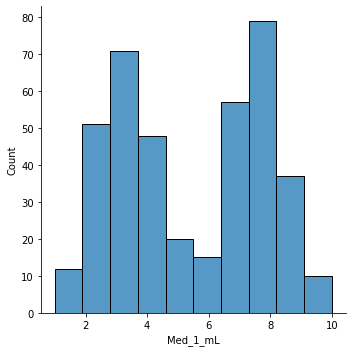

In [11]:
sns.displot(x='Med_1_mL',data=df)

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

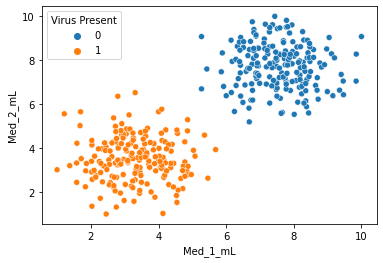

In [12]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df,hue='Virus Present')

<AxesSubplot:xlabel='Med_2_mL'>

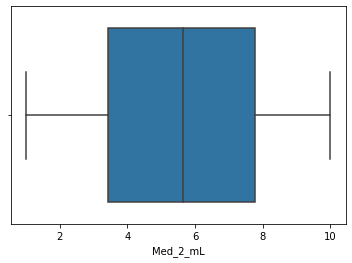

In [13]:
sns.boxplot(x='Med_2_mL',data=df)

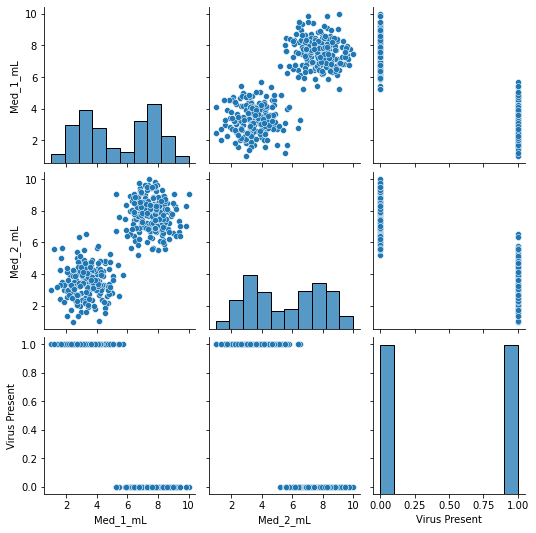

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,Med_1_mL,Med_2_mL,Virus Present
Med_1_mL,1.000000,0.828090,-0.922304
Med_2_mL,0.828090,1.000000,-0.903718
Virus Present,-0.922304,-0.903718,1.000000


<AxesSubplot:>

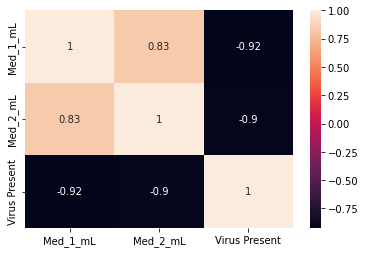

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
X=df.drop('Virus Present',axis=1)
y=df['Virus Present']

# train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.3)

# Modeling

********************
********************
train_accuracy: 1.0
test_accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

********************
********************
[1. 1. 1. 1. 1.]


1.0

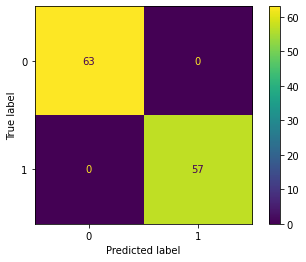

In [19]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

print('*'*20)
train_prediction=svm.predict(X_train)
test_prediction = svm.predict(X_test)

print('*'*20)
from sklearn.metrics import accuracy_score ,classification_report,plot_confusion_matrix

print('train_accuracy:', accuracy_score(y_train,train_prediction))
print('test_accuracy:', accuracy_score(y_test,test_prediction))

print('*'*20)
print(classification_report(y_test,test_prediction))

print('*'*20)
print(plot_confusion_matrix(svm,X_test,y_test))

print('*'*20)
from sklearn.model_selection import cross_val_score
score= cross_val_score(svm,X,y,cv=5)
print(score)
score.mean()



# hypertuning

In [20]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {'C' : [0.01,.1,.2,.3,.5],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

hp= GridSearchCV(estimator,param_grid,cv=5)
hp.fit(X,y)

hp.best_params_

{'C': 0.01, 'kernel': 'linear'}

# rebuilt the model

********************
********************
train_accuracy: 1.0
test_accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

********************
********************
[1. 1. 1. 1. 1.]


1.0

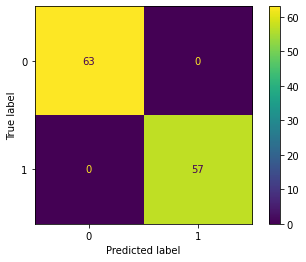

In [21]:
from sklearn.svm import SVC
svm=SVC(C= 0.01,kernel='linear')
svm.fit(X_train,y_train)

print('*'*20)
train_prediction=svm.predict(X_train)
test_prediction = svm.predict(X_test)

print('*'*20)
from sklearn.metrics import accuracy_score ,classification_report,plot_confusion_matrix

print('train_accuracy:', accuracy_score(y_train,train_prediction))
print('test_accuracy:', accuracy_score(y_test,test_prediction))

print('*'*20)
print(classification_report(y_test,test_prediction))

print('*'*20)
print(plot_confusion_matrix(svm,X_test,y_test))

print('*'*20)
from sklearn.model_selection import cross_val_score
score= cross_val_score(svm,X,y,cv=5)
print(score)
score.mean()
